## Pre-requisite (Conda Environment Installation)

Using the guidelines in the ReadMe.md file of the ACTCollaboration GitHub page: https://github.com/ACTCollaboration/DR4_DR5_Notebooks#readme 

The conda environment (with the helpful programming tools and packages for CMB mapping and cleaning) can be installed.

## NOTEBOOK CONTENTS

- 1. Loaded and visualised 9 Planck Frequency Maps
- 2. Convolving Planck Frequency maps (using Spherical harmonic transform method)
- 3. Visualising Convolved Maps
- 4. Getting Covariance Matrix
- 5. Cleaner Map
- 6. Comparison with "True" clean Map from Planck Archive


Notebook Info | Value
---|---
Dependencies | `numpy`, `healpy`, `matplotlib`, `pixell`, `astropy`, `scipy`, `pandas`

## 1. Loading & Visualising Maps 

Task: Using the Planck Legacy Archive at http://pla.esac.esa.int/pla/#results ,Go to Maps —> Simulations —> Total; and download ffp10_newdust_total_XXX_full_map.fits for the 9 Planck frequency channels.



In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from pixell import enmap, utils
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve

The Healpy module hp.read_map has built-in tools that allow you to read maps as well as visualise them. The maps to be read are the loaded 9 frequency maps (FITS files from the Planck Legacy Archive).

Source (Healpy Tutorial): https://healpy.readthedocs.io/en/latest/tutorial.html .

In [3]:
map030 = hp.read_map("ffp10_newdust_total_030_full_map.fits")
map044 = hp.read_map("ffp10_newdust_total_044_full_map.fits")
map070 = hp.read_map("ffp10_newdust_total_070_full_map.fits")
map100 = hp.read_map("ffp10_newdust_total_100_full_map.fits")
map143 = hp.read_map("ffp10_newdust_total_143_full_map.fits")
map217 = hp.read_map("ffp10_newdust_total_217_full_map.fits")
map353 = hp.read_map("ffp10_newdust_total_353_full_map.fits")
map545 = hp.read_map("ffp10_newdust_total_545_full_map.fits")
map857 = hp.read_map("ffp10_newdust_total_857_full_map.fits")

- The read maps are then visualised using  `hp.mollview`. 

- mollweide projection with mollview is the most common visualization tool for HEALPIX maps. It also supports coordinate transformation, coord does Galactic to ecliptic coordinate transformation.
- `norm='hist'` sets a histogram equalized color scale and xsize increases the size of the image.
- `hp.graticule` adds meridians and parallels. 

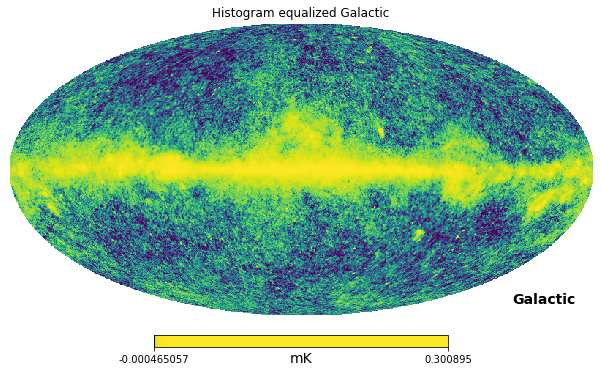

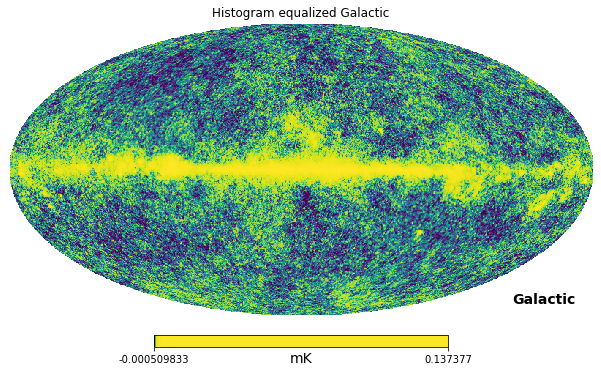

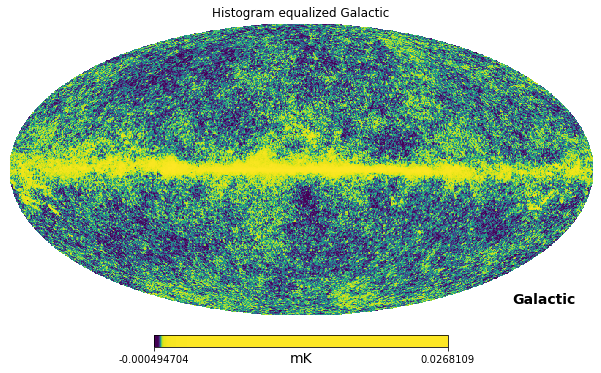

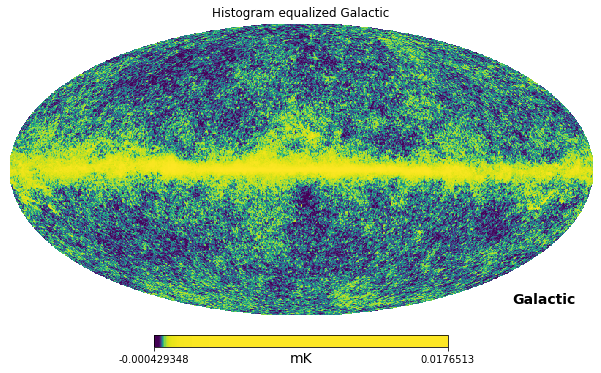

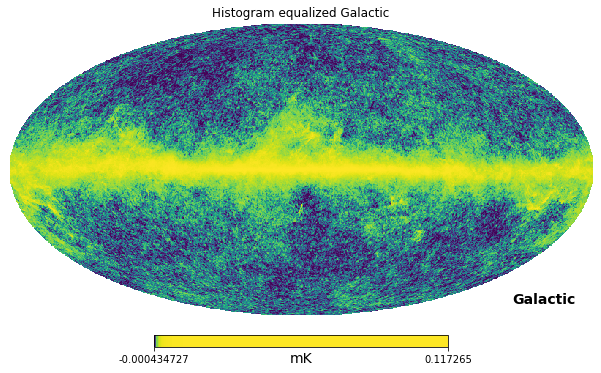

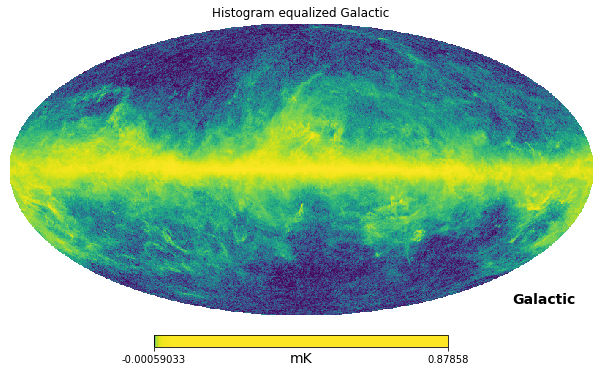

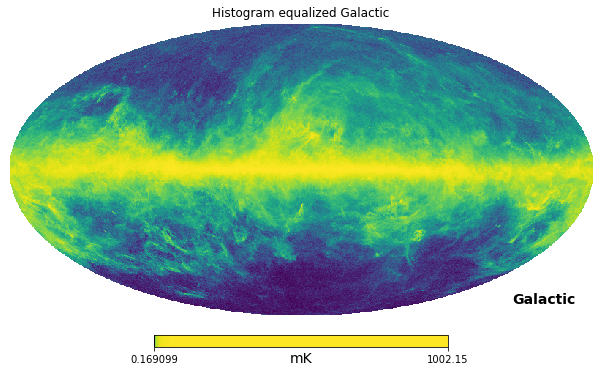

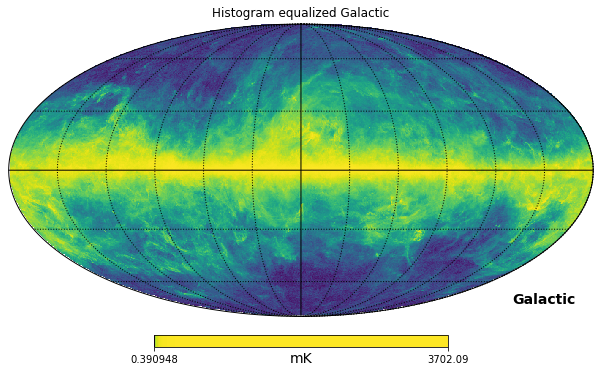

In [5]:
#Optimal way of plotting all maps at once

for arr in [map030,map044,map100,map143,map217,map353,map545, map857]:
    hp.mollview(
        arr,
        coord=["G"],
        title="Histogram equalized Galactic",
        unit="mK",
        norm="hist",
       # min=-1,
        #max=30,
    )
hp.graticule()

It is also possible to modify the range of pixels by setting arbitrary values for the `min` and `max`  arguments. These could be ignored when checking if the map can be visualised using the default scale of the read map(s). 
- If the map fails to be visualised using the default scale, then it will helpful to do a conversion (multiplying the  unit by a correct conversion factor).

## 2. Map Convolution
 Re-convolve the maps to the same effective beam using Spherical harmonic transform method. Using this method, the spherical harmonic coefficients (alms) for data from each map can be computed. The output of this data is in array form. Next, the alms can be converted back to map.
 All these steps have built-in functions for operation using Healpy  `hp.sphtfunc.map2alm` and `hp.sphtfunc.alm2map`

In [6]:
#Using alm (spherical harm transform)

In [7]:
NSIDE = 1024
print("Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
) )

Approximate resolution at NSIDE 1024 is 0.057 deg


In [8]:
NPIX = hp.nside2npix(NSIDE) 
print(NPIX)

12582912


#### 2.1 Getting alms for each Planck map

The functions which obtain the alms perform the below operation:

$ a_{lm}^{i} = \int map*x(r\hat) $ 

where 
$r\hat $ 
is the angle
source (equations of alms) : https://journals.aps.org/prd/pdf/10.1103/PhysRevD.68.123523 (Tegmark et al)


In [9]:
alm030 = hp.sphtfunc.map2alm(map030, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm044 = hp.sphtfunc.map2alm(map044, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm070 = hp.sphtfunc.map2alm(map070, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm100 = hp.sphtfunc.map2alm(map100, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm143 = hp.sphtfunc.map2alm(map143, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm217 = hp.sphtfunc.map2alm(map217, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm353 = hp.sphtfunc.map2alm(map353, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm545 = hp.sphtfunc.map2alm(map545, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)
alm857 = hp.sphtfunc.map2alm(map857, lmax=1300, mmax=None, iter=3, pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)

In [10]:
alm030,alm044,alm070,alm100,alm143,alm217,alm353,alm545,alm857

(array([ 1.16211765e-03+0.00000000e+00j, -1.29597927e-05+0.00000000e+00j,
        -1.32805698e-03+0.00000000e+00j, ...,
         2.49503412e-08-4.73206538e-08j, -1.51505776e-08-3.88394977e-08j,
        -2.92800850e-08-3.33140654e-08j]),
 array([ 2.57267233e-04+0.00000000e+00j, -7.62569673e-06+0.00000000e+00j,
        -4.06798265e-04+0.00000000e+00j, ...,
        -1.42778547e-08-3.25099864e-08j,  4.44627957e-09-1.03787528e-07j,
        -5.72540167e-09-6.20202033e-10j]),
 array([ 2.93246554e-05+0.00000000e+00j, -5.09407774e-06+0.00000000e+00j,
        -1.66107618e-04+0.00000000e+00j, ...,
         1.87553966e-07-6.51000277e-08j,  2.68036578e-08-1.57708268e-07j,
        -1.45744341e-07+2.29528651e-07j]),
 array([ 3.17569153e-04+0.00000000e+00j, -3.01616369e-06+0.00000000e+00j,
        -2.43357734e-04+0.00000000e+00j, ...,
         5.47404247e-08-3.77326468e-08j, -4.23476088e-08+3.99914839e-08j,
        -5.26599358e-08+7.93250985e-08j]),
 array([ 4.66501133e-04+0.00000000e+00j, -3.22847202

### 2.2 : Applying a spherical harmonic transform back to map space (hp.alm2map), using Nside = 1024.

In [12]:
#output:convolved maps
conmap030=hp.sphtfunc.alm2map(alm030,nside=1024)
conmap044=hp.sphtfunc.alm2map(alm044,nside=1024)
conmap070=hp.sphtfunc.alm2map(alm070,nside=1024)
conmap100=hp.sphtfunc.alm2map(alm100,nside=1024)
conmap143=hp.sphtfunc.alm2map(alm143,nside=1024)
conmap217=hp.sphtfunc.alm2map(alm217,nside=1024)
conmap353=hp.sphtfunc.alm2map(alm353,nside=1024)
conmap545=hp.sphtfunc.alm2map(alm545,nside=1024)
conmap857=hp.sphtfunc.alm2map(alm857,nside=1024)


In [13]:
conmap030,conmap044,conmap070,conmap100,conmap143,conmap217,conmap353,conmap545,conmap857

(array([-0.00018566, -0.00016411, -0.00019511, ..., -0.00013042,
        -0.0001177 , -0.0001039 ]),
 array([-0.00020219, -0.00020878, -0.00021051, ..., -0.00015205,
        -0.00016072, -0.00014717]),
 array([-0.00023984, -0.00021272, -0.00022162, ..., -0.00015872,
        -0.00017607, -0.00014046]),
 array([-1.54777879e-04, -1.15587476e-04, -1.45637642e-04, ...,
        -1.26392142e-04, -1.09950585e-04, -7.77204321e-05]),
 array([-1.41281489e-04, -1.04444142e-04, -1.27467909e-04, ...,
        -1.28019442e-04, -1.00489709e-04, -7.42925410e-05]),
 array([-1.15450920e-04, -7.23074544e-05, -1.04062158e-04, ...,
        -1.15333140e-04, -8.25465728e-05, -6.29604183e-05]),
 array([ 2.58638240e-05,  9.21475867e-05,  5.71104477e-05, ...,
        -5.49137575e-05, -2.94588449e-05, -8.06990708e-05]),
 array([0.72715592, 0.73507735, 0.75168543, ..., 0.33229586, 0.32288001,
        0.28841479]),
 array([1.19541091, 1.13701261, 1.17325436, ..., 0.94535018, 0.93862805,
        0.92519211]))

## 3. Visualising the Convolved Maps


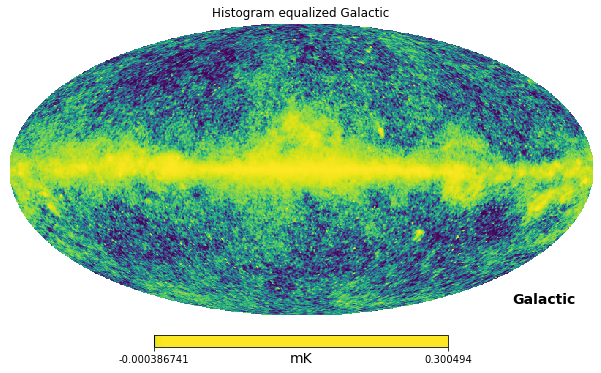

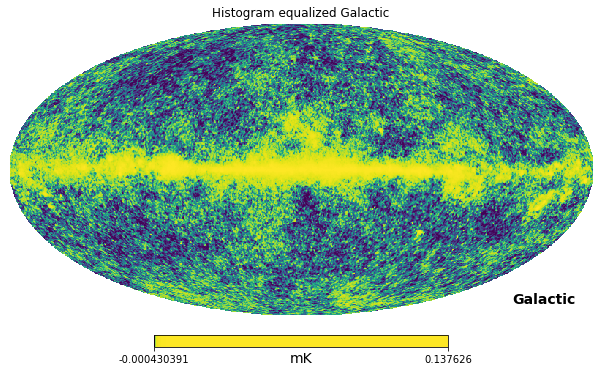

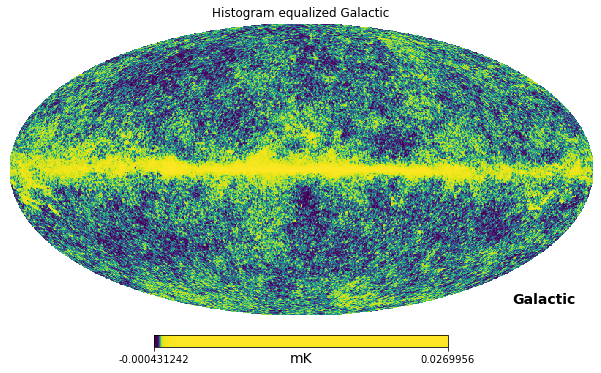

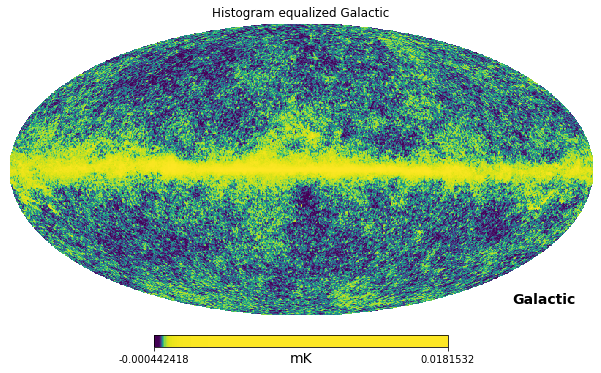

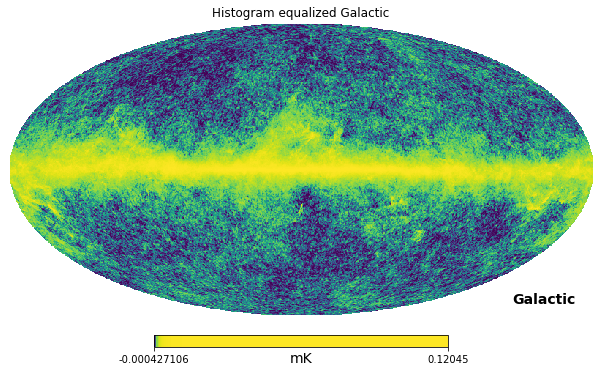

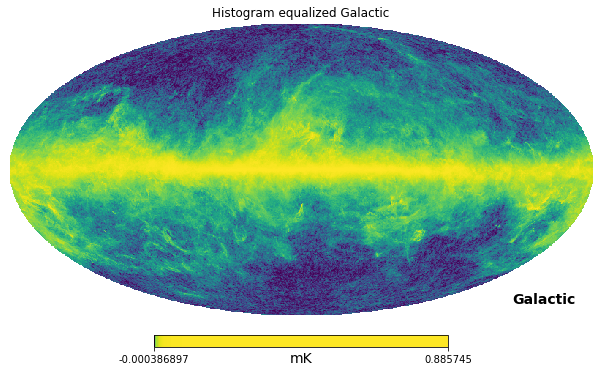

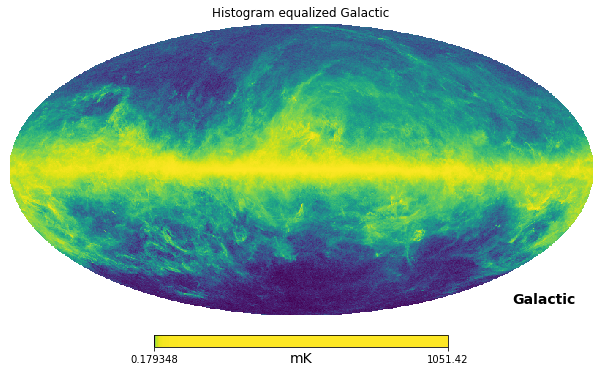

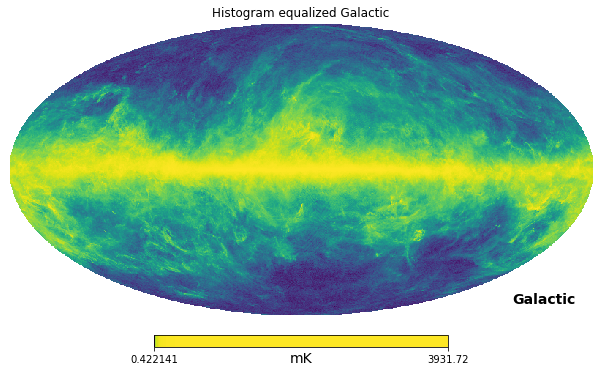

In [14]:
#Optimal way of plotting all maps at once

for arr in [conmap030,conmap044,conmap100,conmap143,conmap217,conmap353,conmap545, conmap857]:
    hp.mollview(
        arr,
        coord=["G"],
        title="Histogram equalized Galactic",
        unit="mK",
        norm="hist",
       
    )

## 4.  Getting Covariance Matrix Bteween all 9 maps (useful for getting weighting matrix for map cleaning)

Covariance matrix is a square matrix giving the statististical relationship between each pair of elements of a given vector. 
- Properties :Any covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances (i.e., the covariance of each element with itself)


In [15]:
from scipy.stats import multivariate_normal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt
def doplt(arr2d,cmap='gray',**kwargs): return(plt.imshow(arr2d,cmap=cmap,**kwargs))
from scipy.linalg import eigh



Since the covariance matrix (cov) will be obtained for 9 maps, the number of dimensions,d, will be 9. Moreover, the samples will be defined for each data set(Maps) used in computing cov.

In [16]:
NPIX = 12582912
d=9
samples=np.zeros((NPIX,9))
samples[:,0] = conmap030
samples[:,1] = conmap044
samples[:,2] = conmap070
samples[:,3] = conmap100
samples[:,4] = conmap143
samples[:,5] = conmap217
samples[:,6] = conmap353
samples[:,7] = conmap545
samples[:,8] = conmap857
cov = np.zeros((d,d))
for idx_r in range(d):
  for idx_c in range(d):
    if idx_c >= idx_r:
      x = samples[:,idx_r]
      y = samples[:,idx_c]
      Ex = x.mean()
      Ey = y.mean()
      print(Ex,Ey)
    
      cov_xy = ((x-Ex)*(y-Ey)).mean()
      cov[idx_r,idx_c] = cov_xy
      if idx_c != idx_r: cov[idx_c,idx_r] = cov_xy
cov

0.0003278273429900794 0.0003278273429900794
0.0003278273429900794 7.257375365790049e-05
0.0003278273429900794 8.272340209991136e-06
0.0003278273429900794 8.958461155776142e-05
0.0003278273429900794 0.00013159754743364614
0.0003278273429900794 0.00046467542052046866
0.0003278273429900794 0.003429513689305295
0.0003278273429900794 3.8685467025569973
0.0003278273429900794 10.834334197874279
7.257375365790049e-05 7.257375365790049e-05
7.257375365790049e-05 8.272340209991136e-06
7.257375365790049e-05 8.958461155776142e-05
7.257375365790049e-05 0.00013159754743364614
7.257375365790049e-05 0.00046467542052046866
7.257375365790049e-05 0.003429513689305295
7.257375365790049e-05 3.8685467025569973
7.257375365790049e-05 10.834334197874279
8.272340209991136e-06 8.272340209991136e-06
8.272340209991136e-06 8.958461155776142e-05
8.272340209991136e-06 0.00013159754743364614
8.272340209991136e-06 0.00046467542052046866
8.272340209991136e-06 0.003429513689305295
8.272340209991136e-06 3.8685467025569973


array([[4.00056414e-06, 1.42929375e-06, 6.30654102e-07, 5.79419861e-07,
        6.28419829e-07, 2.37400730e-06, 1.78172976e-05, 1.87087682e-02,
        5.97386333e-02],
       [1.42929375e-06, 5.25067085e-07, 2.42045054e-07, 2.09466996e-07,
        2.25008186e-07, 8.28886560e-07, 6.16711638e-06, 6.47118331e-03,
        2.07060150e-02],
       [6.30654102e-07, 2.42045054e-07, 1.35023829e-07, 9.92006335e-08,
        1.06534691e-07, 3.76770520e-07, 2.75667638e-06, 2.88219188e-03,
        9.22201450e-03],
       [5.79419861e-07, 2.09466996e-07, 9.92006335e-08, 1.35111501e-07,
        1.40950951e-07, 5.37573008e-07, 3.93884804e-06, 4.11913730e-03,
        1.31915984e-02],
       [6.28419829e-07, 2.25008186e-07, 1.06534691e-07, 1.40950951e-07,
        1.56940393e-07, 5.84215965e-07, 4.32757299e-06, 4.50022198e-03,
        1.42043091e-02],
       [2.37400730e-06, 8.28886560e-07, 3.76770520e-07, 5.37573008e-07,
        5.84215965e-07, 2.35159995e-06, 1.76031096e-05, 1.84013995e-02,
        5.8

The covariance matrix (cov) can be plotted using matplotlib. 

Text(0.5, 1.0, 'Covariance Matrix')

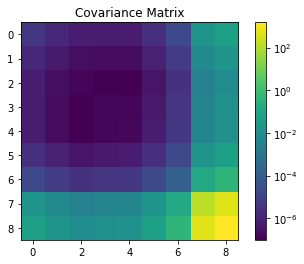

In [17]:
import matplotlib
plt.imshow(cov,cmap='viridis',norm=matplotlib.colors.LogNorm())
plt.colorbar()
matplotlib.pyplot.title('Covariance Matrix', fontdict=None)


In [18]:
df = pd.DataFrame(cov)
df

0             1             2             3             4  \
0  4.000564e-06  1.429294e-06  6.306541e-07  5.794199e-07  6.284198e-07   
1  1.429294e-06  5.250671e-07  2.420451e-07  2.094670e-07  2.250082e-07   
2  6.306541e-07  2.420451e-07  1.350238e-07  9.920063e-08  1.065347e-07   
3  5.794199e-07  2.094670e-07  9.920063e-08  1.351115e-07  1.409510e-07   
4  6.284198e-07  2.250082e-07  1.065347e-07  1.409510e-07  1.569404e-07   
5  2.374007e-06  8.288866e-07  3.767705e-07  5.375730e-07  5.842160e-07   
6  1.781730e-05  6.167116e-06  2.756676e-06  3.938848e-06  4.327573e-06   
7  1.870877e-02  6.471183e-03  2.882192e-03  4.119137e-03  4.500222e-03   
8  5.973863e-02  2.070601e-02  9.222014e-03  1.319160e-02  1.420431e-02   

              5         6           7            8  
0  2.374007e-06  0.000018    0.018709     0.059739  
1  8.288866e-07  0.000006    0.006471     0.020706  
2  3.767705e-07  0.000003    0.002882     0.009222  
3  5.375730e-07  0.000004    0.004119     0.013192  
4  5.842160e-07  0.000004    0.004500     0.014204  
5  2.351600e-06  0.000018    0.018401     0.058518  
6  1.760311e-05  0.000133    0.139084     0.442290  
7  1.840140e-02  0.139084  146.386812   467.792561  
8  5.851797e-02  0.442290  467.792561  1505.352527

## Getting weighting matrix

$ w_l = \frac{C^{-1}*e}{e^{T}*C^{-1}*e} $


where C is the covariance matrix. 


In [22]:
#inverting covariance matrix cov,

cov_inv = np.linalg.inv(cov) 
cov_inv

array([[ 1.88007832e+07, -5.76682120e+07,  1.81890110e+07,
         6.53410147e+06,  6.35437379e+06,  8.45778180e+05,
         3.55075511e+05, -2.30283490e+03,  3.96891128e+02],
       [-5.76682120e+07,  1.93035643e+08, -7.82714103e+07,
        -5.00920449e+07, -1.18809589e+07,  2.38445237e+07,
        -4.82469680e+06,  7.17599427e+03, -1.07542708e+03],
       [ 1.81890110e+07, -7.82714103e+07,  6.69967968e+07,
         3.29404667e+07, -2.05381123e+07, -2.23466675e+07,
         3.02256781e+06,  1.39368528e+02, -2.13184117e+02],
       [ 6.53410147e+06, -5.00920449e+07,  3.29404667e+07,
         5.93246322e+08, -2.77784172e+08, -3.32801479e+08,
         3.31851301e+07,  2.96643241e+04, -8.38101984e+03],
       [ 6.35437379e+06, -1.18809589e+07, -2.05381123e+07,
        -2.77784172e+08,  3.01786505e+08,  4.40783980e+07,
         9.58993845e+06, -4.50936966e+04,  9.10559965e+03],
       [ 8.45778180e+05,  2.38445237e+07, -2.23466675e+07,
        -3.32801479e+08,  4.40783980e+07,  3.621811

In [25]:
e = (1,1,1,1,1,1,1,1,1)

In [26]:
#make 'e' as array
e = np.array(e)
e



array([1, 1, 1, 1, 1, 1, 1, 1, 1])

each entry in matrix e, 'e',  corresponds to the planck map used. e.g for 9 Planck maps, matrix e is a 1 row matrix with 9 entries of 1.

In [27]:
#transpose 'e'
e_T = e.T
e_T

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
#numerator : (C^-1)*e
np.dot(cov_inv,e)

array([-6.59099471e+06,  1.41489444e+07, -7.42158345e+03,  5.24960878e+06,
        5.15699846e+07,  1.07085993e+07, -3.85967102e+06, -9.87903046e+01,
        2.82813812e+02])

In [29]:
#denominator: e_T*(C^-1)*e
np.dot(e_T, np.dot(cov_inv,e))

71219233.738587

In [30]:
w_l = np.dot(cov_inv,e)/np.dot(e_T, np.dot(cov_inv,e))
w_l

array([-9.25451506e-02,  1.98667462e-01, -1.04207572e-04,  7.37105484e-02,
        7.24101930e-01,  1.50361057e-01, -5.41942228e-02, -1.38712956e-06,
        3.97103138e-06])

### Getting Clean CMB Map
Method: Getting weighted sum and visualising

In [32]:
pd.DataFrame(w_l)

0
0 -0.092545
1  0.198667
2 -0.000104
3  0.073711
4  0.724102
5  0.150361
6 -0.054194
7 -0.000001
8  0.000004

In [33]:
w_l[0],w_l[1],w_l[2],w_l[3],w_l[4],w_l[5],w_l[6],w_l[7],w_l[8]

(-0.09254515061458063,
 0.1986674618197064,
 -0.00010420757236976148,
 0.07371054842481413,
 0.7241019299166491,
 0.15036105691026416,
 -0.054194222786299595,
 -1.387129563303221e-06,
 3.971031379592644e-06)

In [34]:
weighted_sum = w_l[0]*conmap030 + w_l[1]*conmap044 + w_l[2]*conmap070 + w_l[3]*conmap100 + w_l[4]*conmap143 + w_l[5]*conmap217 + w_l[6]*conmap353 + w_l[7]*conmap545 + w_l[8]*conmap857

In [35]:
weighted_sum

array([-1.51696459e-04, -1.22787307e-04, -1.41902849e-04, ...,
       -1.31208312e-04, -1.09425180e-04, -8.09524927e-05])

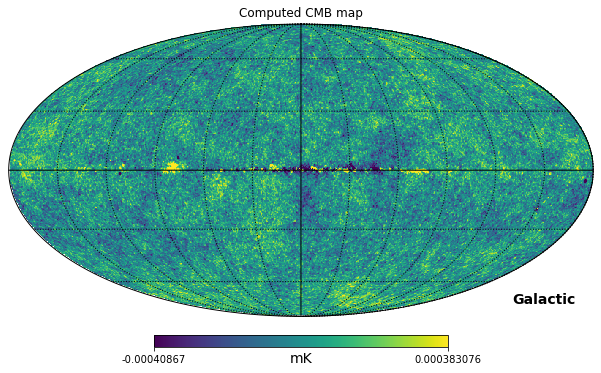

In [40]:
#Visualising
hp.mollview(
    weighted_sum,
    coord=["G"],
    title="Computed CMB map",
    unit="mK",
    #norm="hist",
    min = -0.00040867,
    max = 0.000383076
    
    
)
hp.graticule()


## Comparing With "True" CMB Map from Planck Archive

Loading "True" map


Tool 


!curl "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_030_mc_0000.fits" -o febecop_ffp10_lensed_scl_cmb_030_mc_0000.fits

In [43]:
true_map = hp.read_map("febecop_ffp10_lensed_scl_cmb_030_mc_0000.fits")
true_map

array([-1.80819959e-04, -1.90524952e-04, -1.85032288e-04, ...,
        2.71742829e-05,  2.66766510e-05,  1.93351334e-05])

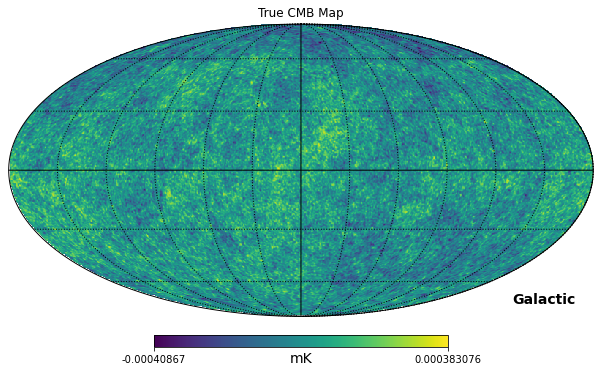

In [44]:
hp.mollview(
    true_map,
    coord=["G"],
    title="True CMB Map",
    unit="mK",
    #norm="hist",
    
)
hp.graticule()

Observation
Galactic plane is slightly cleaner in true map than in computed cmb



In [45]:
#weighted_sum is an array which holds info on the computed clean cmb map



In [51]:
truemapDG= hp.pixelfunc.ud_grade(true_map,512, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
truemapDG

array([-1.77726088e-04, -1.97400906e-04, -1.86496851e-04, ...,
        3.13803516e-05,  3.02910503e-05,  1.49700363e-05])

In [52]:
computedmapDG= hp.pixelfunc.ud_grade(weighted_sum,512, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
computedmapDG

array([-1.53447926e-04, -1.07313421e-04, -1.34142490e-04, ...,
       -1.41211750e-04, -1.10342494e-04, -6.28096437e-05])

In [53]:
np.max((truemapDG - computedmapDG)/truemapDG)

5704610.049227973

In [54]:
np.max((true_map - weighted_sum)/true_map) - np.max((truemapDG - computedmapDG)/truemapDG)

-4527600.143670941

In [55]:
#Power Spectrum of the difference

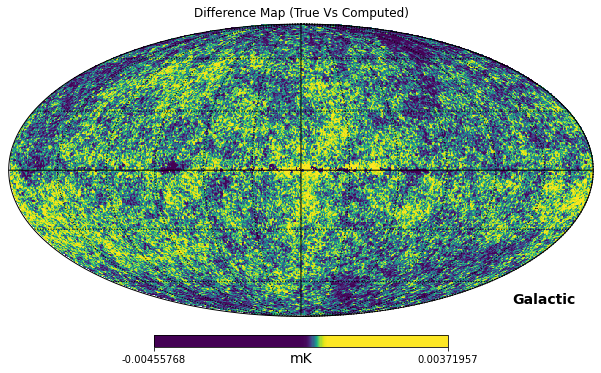

In [56]:
hp.mollview(
    (true_map - weighted_sum),
    coord=["G"],
    title="Difference Map (True Vs Computed)",
    unit="mK",
    norm="hist",
    
)
hp.graticule()

In [67]:



cls = hp.anafast(true_map, lmax=5000 , use_pixel_weights = True )
cls2 = hp.anafast(weighted_sum, lmax=5000, use_pixel_weights = True)




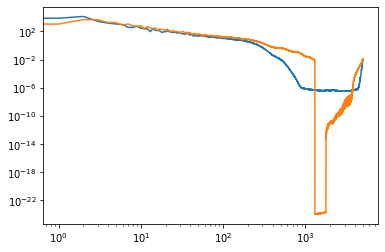

In [68]:
plt.plot((2.72e6)**2 *cls)
plt.xscale('log')
plt.yscale('log')

plt.plot((2.72e6)**2 *cls2)


In [69]:

#both maps agree well on large scales

Comparing Difference Maps Does not give enough Information on the accuracy of the Computed Map

In [34]:
true_map

array([-1.80819959e-04, -1.90524952e-04, -1.85032288e-04, ...,
        2.71742829e-05,  2.66766510e-05,  1.93351334e-05])

In [35]:
weighted_sum

array([-1.51696459e-04, -1.22787307e-04, -1.41902849e-04, ...,
       -1.31208312e-04, -1.09425180e-04, -8.09524927e-05])

In [36]:
difference = true_map - weighted_sum
difference

array([-2.91235007e-05, -6.77376446e-05, -4.31294390e-05, ...,
        1.58382595e-04,  1.36101831e-04,  1.00287626e-04])

In [37]:
true_map == difference

array([False, False, False, ..., False, False, False])

In [38]:
#Good, as expected

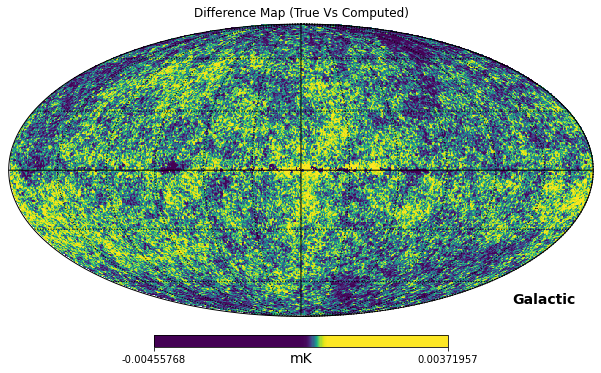

In [39]:
hp.mollview(difference,
    coord=["G"],
    title="Difference Map (True Vs Computed)",
    unit="mK",
    norm="hist",
    
)
hp.graticule()

In [40]:
pd.DataFrame(difference)

0
0        -0.000029
1        -0.000068
2        -0.000043
3         0.000004
4        -0.000005
...            ...
12582907  0.000073
12582908  0.000124
12582909  0.000158
12582910  0.000136
12582911  0.000100

[12582912 rows x 1 columns]